# Installing and Impoting Packages

In [1]:
using Pkg

In [2]:
# Adding Packages if missing any
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("GLM")
Pkg.add("StatsBase")
Pkg.add("Lathe")
Pkg.add("MLBase")
Pkg.add("ClassImbalance")
Pkg.add("ROCAnalysis")
Pkg.add("StatsPlots")
Pkg.add("StatsPlots")

   Updating registry at `C:\Users\DS\.julia\registries\General`
  Resolving package versions...
No Changes to `C:\Users\DS\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\DS\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\DS\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\DS\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\DS\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\DS\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\DS\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\DS\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\DS\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\DS\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\DS\.julia\environments\v1.5\Project.toml`
No Changes to

In [3]:
# Using packages
using DataFrames
using CSV
using Plots
using GLM
using StatsBase
using Lathe
using MLBase
using ClassImbalance
using ROCAnalysis
using StatsPlots
using Statistics

In [4]:
# Enable Printing of 1000 columns
ENV["COLUMNS"] = 1000

1000

# Dataset

In [5]:
# Reading dataset
df = DataFrame(CSV.File("data.csv"))

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
2,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
3,84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
5,84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678
6,843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244
7,844359,M,18.25,19.98,119.6,1040.0,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
8,84458202,M,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151
9,844981,M,13.0,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072


# Data Analysis

In [6]:
# First five record in our dataset
first(df, 5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
2,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
3,84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
5,84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678


In [7]:
# Last five record in our dataset
last(df, 5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,926424,M,21.56,22.39,142.0,1479.0,0.111,0.1159,0.2439,0.1389,0.1726,0.05623,1.176,1.256,7.673,158.7,0.0103,0.02891,0.05198,0.02454,0.01114,0.004239,25.45,26.4,166.1,2027.0,0.141,0.2113,0.4107,0.2216,0.206,0.07115
2,926682,M,20.13,28.25,131.2,1261.0,0.0978,0.1034,0.144,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.0395,0.01678,0.01898,0.002498,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
3,926954,M,16.6,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,0.159,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.0473,0.01557,0.01318,0.003892,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.0782
4,927241,M,20.6,29.33,140.1,1265.0,0.1178,0.277,0.3514,0.152,0.2397,0.07016,0.726,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.74,39.42,184.6,1821.0,0.165,0.8681,0.9387,0.265,0.4087,0.124
5,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0,0.0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.0,0.0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0,0.0,0.2871,0.07039


In [8]:
# Describe function to get more insight 
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,id,3.03718e7,8670,906024.0,911320502,,,Int64
2,diagnosis,,B,,M,2,,String
3,radius_mean,14.1273,6.981,13.37,28.11,,,Float64
4,texture_mean,19.2896,9.71,18.84,39.28,,,Float64
5,perimeter_mean,91.969,43.79,86.24,188.5,,,Float64
6,area_mean,654.889,143.5,551.1,2501.0,,,Float64
7,smoothness_mean,0.0963603,0.05263,0.09587,0.1634,,,Float64
8,compactness_mean,0.104341,0.01938,0.09263,0.3454,,,Float64
9,concavity_mean,0.0887993,0.0,0.06154,0.4268,,,Float64


In [9]:
# Printing names of All the columns that we have in our dataset
names(df)

32-element Array{Symbol,1}:
 :id
 :diagnosis
 :radius_mean
 :texture_mean
 :perimeter_mean
 :area_mean
 :smoothness_mean
 :compactness_mean
 :concavity_mean
 Symbol("concave points_mean")
 :symmetry_mean
 :fractal_dimension_mean
 :radius_se
 ⋮
 :symmetry_se
 :fractal_dimension_se
 :radius_worst
 :texture_worst
 :perimeter_worst
 :area_worst
 :smoothness_worst
 :compactness_worst
 :concavity_worst
 Symbol("concave points_worst")
 :symmetry_worst
 :fractal_dimension_worst

In [10]:
# Display the total size of our dataset
size(df)

(569, 32)

# DataPre-Processing

In [11]:
# Using OneHotEncode for Encoding
Lathe.preprocess.OneHotEncode(df, :diagnosis)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M,B
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Bool
1,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,1,0
2,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902,1,0
3,84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,1,0
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,1,0
5,84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678,1,0
6,843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244,1,0
7,844359,M,18.25,19.98,119.6,1040.0,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1,0
8,84458202,M,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151,1,0
9,844981,M,13.0,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072,1,0


In [12]:
# Creating two dataframes - Later used for plotting Graphs 
    # df_M with records that diagnosed to M
    # df_B with records that diagnosed to B

df_M = filter(row -> row.diagnosis in ["M"], df);
df_B = filter(row -> row.diagnosis in ["B"], df);

In [13]:
# Removing columns of no use
select!(df, Not([:diagnosis, :B, :id]))

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool
1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,1
2,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902,1
3,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,1
4,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,1
5,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678,1
6,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244,1
7,18.25,19.98,119.6,1040.0,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1
8,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151,1
9,13.0,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072,1


In [14]:
# Describing again after updating the data
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,radius_mean,14.1273,6.981,13.37,28.11,,,Float64
2,texture_mean,19.2896,9.71,18.84,39.28,,,Float64
3,perimeter_mean,91.969,43.79,86.24,188.5,,,Float64
4,area_mean,654.889,143.5,551.1,2501.0,,,Float64
5,smoothness_mean,0.0963603,0.05263,0.09587,0.1634,,,Float64
6,compactness_mean,0.104341,0.01938,0.09263,0.3454,,,Float64
7,concavity_mean,0.0887993,0.0,0.06154,0.4268,,,Float64
8,concave points_mean,0.0489191,0.0,0.0335,0.2012,,,Float64
9,symmetry_mean,0.181162,0.106,0.1792,0.304,,,Float64


# Correlation
> Correlation is useful in understanding how likely a feature will affect our output

In [15]:
println("Correleation Radius Mean : ", cor(df.radius_mean, df.M))
println("Correleation Radius Mean : ", cor(df.texture_mean, df.M))
println("Correleation Radius Mean : ", cor(df.perimeter_mean, df.M))
println("Correleation Radius Mean : ", cor(df.area_mean, df.M))
println("Correleation Radius Mean : ", cor(df.smoothness_mean, df.M))
println("Correleation Radius Mean : ", cor(df.compactness_mean, df.M))
println("Correleation Radius Mean : ", cor(df.concavity_mean, df.M))


Correleation Radius Mean : 0.7300285113754562
Correleation Radius Mean : 0.4151852998452043
Correleation Radius Mean : 0.7426355297258328
Correleation Radius Mean : 0.7089838365853895
Correleation Radius Mean : 0.3585599650859318
Correleation Radius Mean : 0.596533677508253
Correleation Radius Mean : 0.6963597071719055


In [16]:
println("Correleation Radius Mean : ", cor(df.fractal_dimension_mean, df.M))
println("Correleation Radius Mean : ", cor(df.radius_se, df.M))
println("Correleation Radius Mean : ", cor(df.texture_se, df.M))
println("Correleation Radius Mean : ", cor(df.perimeter_se, df.M))
println("Correleation Radius Mean : ", cor(df.area_se, df.M))
println("Correleation Radius Mean : ", cor(df.smoothness_se, df.M))

Correleation Radius Mean : -0.012837602698432399
Correleation Radius Mean : 0.5671338208247174
Correleation Radius Mean : -0.008303332973877402
Correleation Radius Mean : 0.5561407034314828
Correleation Radius Mean : 0.548235940278024
Correleation Radius Mean : -0.06701601057948728


In [17]:
println("Correleation Radius Mean : ", cor(df.compactness_se, df.M))
println("Correleation Radius Mean : ", cor(df.concavity_se, df.M))
println("Correleation Radius Mean : ", cor(df.symmetry_se, df.M))
println("Correleation Radius Mean : ", cor(df.fractal_dimension_se, df.M))
println("Correleation Radius Mean : ", cor(df.radius_worst, df.M))
println("Correleation Radius Mean : ", cor(df.texture_worst, df.M))
println("Correleation Radius Mean : ", cor(df.perimeter_worst, df.M))

Correleation Radius Mean : 0.29299924424885815
Correleation Radius Mean : 0.25372976598083014
Correleation Radius Mean : -0.00652175587064794
Correleation Radius Mean : 0.0779724173902561
Correleation Radius Mean : 0.7764537785950392
Correleation Radius Mean : 0.45690282139679805
Correleation Radius Mean : 0.7829141371737588


In [18]:
println("Correleation Radius Mean : ", cor(df.area_worst, df.M))
println("Correleation Radius Mean : ", cor(df.smoothness_worst, df.M))
println("Correleation Radius Mean : ", cor(df.compactness_worst, df.M))
println("Correleation Radius Mean : ", cor(df.concavity_worst, df.M))
println("Correleation Radius Mean : ", cor(df.symmetry_worst, df.M))
println("Correleation Radius Mean : ", cor(df.fractal_dimension_worst, df.M))
println("Correleation Radius Mean : ", cor(df.M, df.M))


Correleation Radius Mean : 0.7338250349210507
Correleation Radius Mean : 0.42146486106640246
Correleation Radius Mean : 0.5909982378417916
Correleation Radius Mean : 0.6596102103692327
Correleation Radius Mean : 0.4162943110486189
Correleation Radius Mean : 0.32387218872082385
Correleation Radius Mean : 1.0


# Plots 
> Visualizing data for better understanding data

┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:569.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:569.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `fillcolor` does not match data indices 1:569.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:569.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:569.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:569.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) o

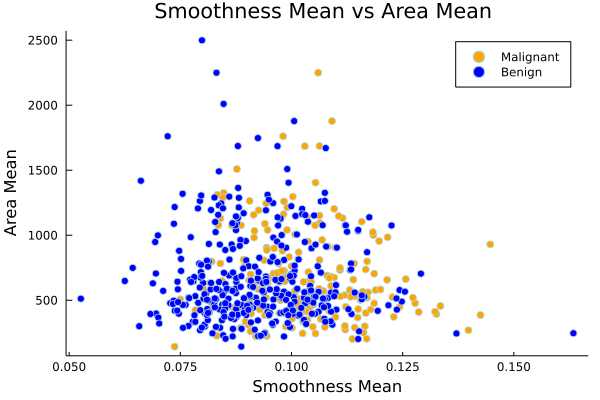

┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:569.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:569.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:569.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `fillcolor` does not match data indices 1:569.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:569.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:569.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1)

In [19]:
scatter(df_M[:smoothness_mean], df[:area_mean], 
        title = "Smoothness Mean vs Area Mean ", 
        xlabel = "Smoothness Mean", 
        ylabel = "Area Mean", 
        grid = false,
        markerstrokecolor = :lightblue,
        #yticks = [0.060,0.080,0.100,0.120,0.130,0.150],
        color = [:orange],
        label = "Malignant",
        legend = true)

scatter!(df_B[:smoothness_mean], df[:area_mean], 
        title = "Smoothness Mean vs Area Mean ", 
        xlabel = "Smoothness Mean", 
        ylabel = "Area Mean", 
        grid = false,
        markerstrokecolor = :lightblue,
        #yticks = [0.060,0.080,0.100,0.120,0.130,0.150],
        color = [:blue],
        label = "Benign",
        legend = true)


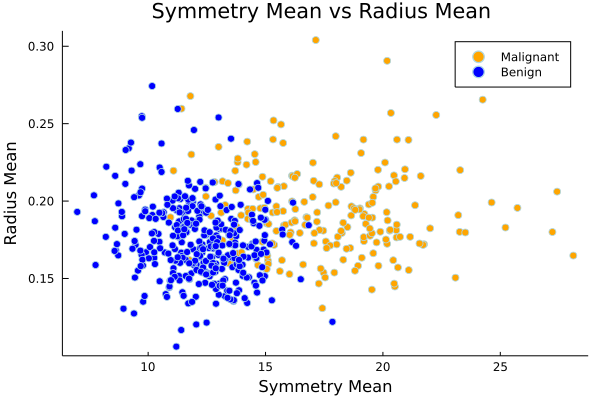

┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `fillcolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) o

In [20]:
scatter(df_M[:radius_mean], df_M[:symmetry_mean], 
        title = "Symmetry Mean vs Radius Mean ", 
        xlabel = "Symmetry Mean", 
        ylabel = "Radius Mean", 
        grid = false,
        markerstrokecolor = :lightblue,
        #yticks = [0.060,0.080,0.100,0.120,0.130,0.150],
        color = [:orange], 
        label = "Malignant",
        legend = true)

scatter!(df_B[:radius_mean], df_B[:symmetry_mean],  
        title = "Symmetry Mean vs Radius Mean ", 
        xlabel = "Symmetry Mean", 
        ylabel = "Radius Mean", 
        grid = false,
        markerstrokecolor = :lightblue,
        #yticks = [0.060,0.080,0.100,0.120,0.130,0.150],
        color = [:blue], 
        label = "Benign",
        legend = true)

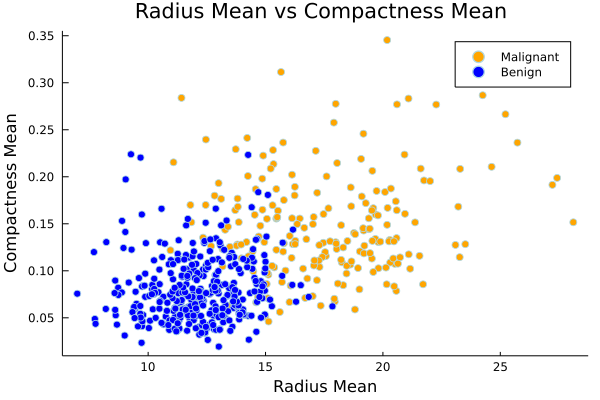

┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `fillcolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) o

In [21]:
scatter(df_M[:radius_mean], df_M[:compactness_mean], 
        title = "Radius Mean vs Compactness Mean ", 
        xlabel = "Radius Mean", 
        ylabel = "Compactness Mean", 
        grid = false,
        markerstrokecolor = :lightblue,
        #yticks = [0.060,0.080,0.100,0.120,0.130,0.150],
        color = [:orange], 
        label = "Malignant",
        legend = true)

scatter!(df_B[:radius_mean], df_B[:compactness_mean],  
        title = "Radius Mean vs Compactness Mean ", 
        xlabel = "Radius Mean", 
        ylabel = "Compactness Mean", 
        grid = false,
        markerstrokecolor = :lightblue,
        #yticks = [0.060,0.080,0.100,0.120,0.130,0.150],
        color = [:blue], 
        label = "Benign",
        legend = true)

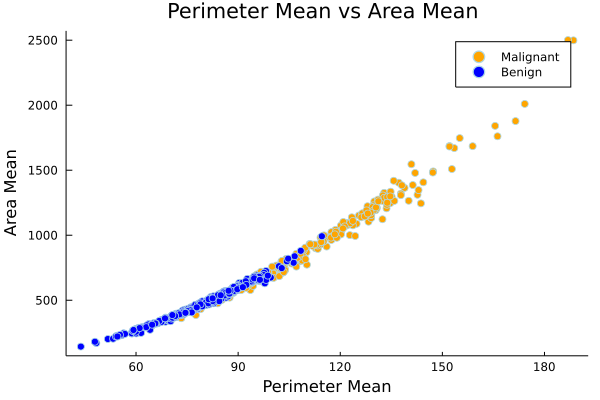

┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `fillcolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) o

In [22]:
scatter(df_M[:perimeter_mean], df_M[:area_mean], 
        title = "Perimeter Mean vs Area Mean ", 
        xlabel = "Perimeter Mean", 
        ylabel = "Area Mean", 
        grid = false,
        markerstrokecolor = :lightblue,
        #yticks = [0.060,0.080,0.100,0.120,0.130,0.150],
        color = [:orange], 
        label = "Malignant",
        legend = true)

scatter!(df_B[:perimeter_mean], df_B[:area_mean],  
        title = "Perimeter Mean vs Area Mean ", 
        xlabel = "Perimeter Mean", 
        ylabel = "Area Mean", 
        grid = false,
        markerstrokecolor = :lightblue,
        #yticks = [0.060,0.080,0.100,0.120,0.130,0.150],
        color = [:blue], 
        label = "Benign",
        legend = true)

┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `fillcolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) o

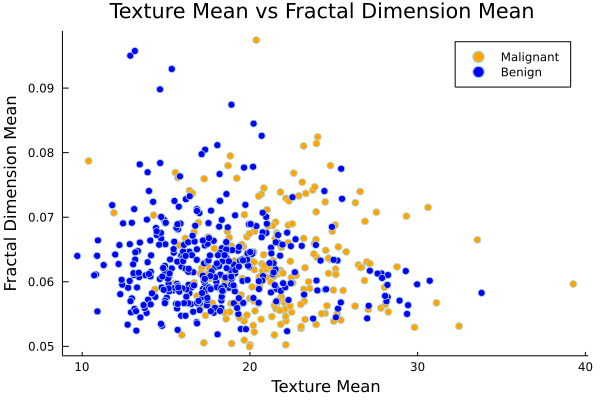

┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `fillcolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:357.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:357.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) o

In [23]:
scatter(df_M[:texture_mean], df_M[:fractal_dimension_mean], 
        title = "Texture Mean vs Fractal Dimension Mean ", 
        xlabel = "Texture Mean", 
        ylabel = "Fractal Dimension Mean", 
        grid = false,
        markerstrokecolor = :lightblue,
        #yticks = [0.060,0.080,0.100,0.120,0.130,0.150],
        color = [:orange], 
        label = "Malignant",
        legend = true)

scatter!(df_B[:texture_mean], df_B[:fractal_dimension_mean],  
        title = "Texture Mean vs Fractal Dimension Mean ", 
        xlabel = "Texture Mean", 
        ylabel = "Fractal Dimension Mean", 
        grid = false,
        markerstrokecolor = :lightblue,
        #yticks = [0.060,0.080,0.100,0.120,0.130,0.150],
        color = [:blue], 
        label = "Benign",
        legend = true)

┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `fillcolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) o

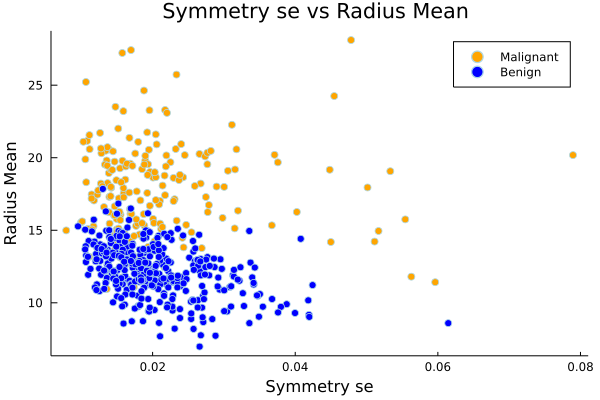

┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `fillcolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:357.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:357.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) o

In [24]:
scatter(df_M[:symmetry_se], df_M[:radius_mean], 
        title = "Symmetry se vs Radius Mean ", 
        xlabel = "Symmetry se", 
        ylabel = "Radius Mean", 
        grid = false,
        markerstrokecolor = :lightblue,
        #yticks = [0.060,0.080,0.100,0.120,0.130,0.150],
        color = [:orange], 
        label = "Malignant",
        legend = true)

scatter!(df_B[:symmetry_se], df_B[:radius_mean],  
        title = "Symmetry se vs Radius Mean ", 
        xlabel = "Symmetry se", 
        ylabel = "Radius Mean", 
        grid = false,
        markerstrokecolor = :lightblue,
        #yticks = [0.060,0.080,0.100,0.120,0.130,0.150],
        color = [:blue], 
        label = "Benign",
        legend = true)

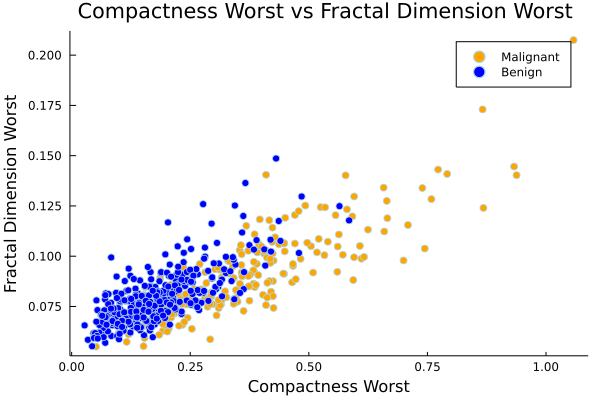

┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `fillcolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:212.
└ @ Plots C:\Users\DS\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) o

In [25]:
scatter(df_M[:compactness_worst], df_M[:fractal_dimension_worst], 
        title = "Compactness Worst vs Fractal Dimension Worst ", 
        xlabel = "Compactness Worst", 
        ylabel = "Fractal Dimension Worst", 
        grid = false,
        markerstrokecolor = :lightblue,
        #yticks = [0.060,0.080,0.100,0.120,0.130,0.150],
        color = [:orange], 
        label = "Malignant",
        legend = true)

scatter!(df_B[:compactness_worst], df_B[:fractal_dimension_worst],  
        title = "Compactness Worst vs Fractal Dimension Worst ", 
        xlabel = "Compactness Worst", 
        ylabel = "Fractal Dimension Worst", 
        grid = false,
        markerstrokecolor = :lightblue,
        #yticks = [0.060,0.080,0.100,0.120,0.130,0.150],
        color = [:blue], 
        label = "Benign",
        legend = true)

# Prepration for Histogram
> We are basically creating two array with output: 0, 1 
> So that we can plot histogram for diagnosis result

In [26]:
df_M1 = df[:M]

vector1 = [0]
vector0 = [1]

for val in df_M1
    if(val == 1)
        push!(vector1, 1)
    else
        push!(vector0, 0)
    end
end


# Histogram

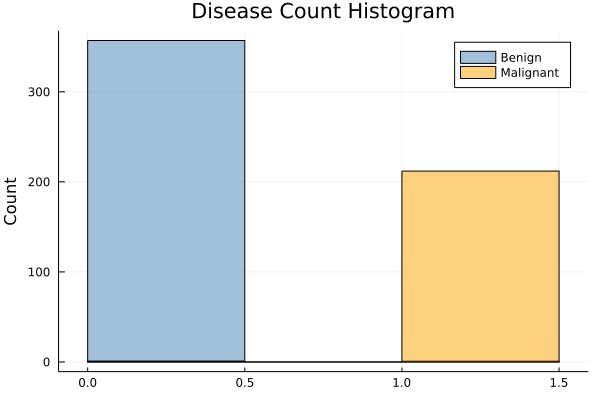

In [27]:
histogram(
    vector0,
    bins = 4,
    marker = (10, 0.5, [:none :+ :none]),
    markerstrokewidth = 0,
    color = [:steelblue :orangered :green],
    fill = 0.5,
    orientation = [:v :v :h],
    label = "Benign",
    ylabel = "Count"
)

histogram!(
    vector1,
    bins = 4,
    marker = (10, 0.5, [:none :+ :none]),
    markerstrokewidth = 0,
    color = [:orange :orangered :green],
    fill = 0.5,
    orientation = [:v :v :h],
    label = "Malignant",
    title = "Disease Count Histogram",
    ylabel = "Count"
)



# Model Training
> Logistic Regression

In [28]:
# Splitting Dataset
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(df, .75)


(441×31 DataFrame
│ Row │ radius_mean │ texture_mean │ perimeter_mean │ area_mean │ smoothness_mean │ compactness_mean │ concavity_mean │ concave points_mean │ symmetry_mean │ fractal_dimension_mean │ radius_se │ texture_se │ perimeter_se │ area_se │ smoothness_se │ compactness_se │ concavity_se │ concave points_se │ symmetry_se │ fractal_dimension_se │ radius_worst │ texture_worst │ perimeter_worst │ area_worst │ smoothness_worst │ compactness_worst │ concavity_worst │ concave points_worst │ symmetry_worst │ fractal_dimension_worst │ M    │
│     │ Float64     │ Float64      │ Float64        │ Float64   │ Float64         │ Float64          │ Float64        │ Float64             │ Float64       │ Float64                │ Float64   │ Float64    │ Float64      │ Float64 │ Float64       │ Float64        │ Float64      │ Float64           │ Float64     │ Float64              │ Float64      │ Float64       │ Float64         │ Float64    │ Float64          │ Float64           │ Float64      

In [29]:
model = @formula(M ~ (radius_mean + texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + perimeter_se + area_se + smoothness_se + compactness_se + concavity_se + symmetry_se + fractal_dimension_se + radius_worst + texture_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + concavity_worst + symmetry_worst + fractal_dimension_worst))
logit = glm(model, train, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},ProbitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

M ~ 1 + radius_mean + texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + perimeter_se + area_se + smoothness_se + compactness_se + concavity_se + symmetry_se + fractal_dimension_se + radius_worst + texture_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + concavity_worst + symmetry_worst + fractal_dimension_worst

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────────────
                                  Coef.   Std. Error      z  Pr(>|z|)       Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)       

In [30]:
# Predicting on test dataset
prediction = predict(logit, test)

128-element Array{Union{Missing, Float64},1}:
 1.0
 1.0
 1.0
 0.9999998562441568
 1.0
 1.0
 1.0
 0.9999999999863234
 0.9999989883592483
 1.018654099190441e-5
 1.0
 1.0
 3.4092280657263594e-11
 ⋮
 0.005853208282433176
 0.0007934811506383434
 8.740645190975105e-10
 1.0
 0.9224255817858682
 0.00010260872115175182
 0.002680471008480678
 1.0184252361002914e-26
 7.314101527572213e-19
 4.455917951007829e-6
 2.696125468417887e-6
 2.2209141792499318e-23

In [31]:
# Conveting probability score into class
prediction_class = [if x < 0.5 0 else 1 end for x in prediction]

prediction_df = DataFrame(y_actual = test.M, y_predicted = prediction_class, prob_predicted = prediction);
prediction_df.correctly_classified = prediction_df.y_actual .== prediction_df.y_predicted

128-element BitArray{1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [32]:
# Accuracy of Logistic Regression Model
# For Test Dataset
accuracy = mean(prediction_df.correctly_classified)

0.9765625

In [33]:
# confusion matrix
confusion_matrix = MLBase.roc(prediction_df.y_actual, prediction_df.y_predicted)

ROCNums{Int64}
  p = 41
  n = 87
  tp = 41
  tn = 84
  fp = 3
  fn = 0
